In [1]:
# based off of https://github.com/Xilinx/PYNQ/blob/master/boards/Pynq-Z1/base/notebooks/video/opencv_face_detect_hdmi.ipynb



from pynq.overlays.base import BaseOverlay
from pynq.lib.video import *

base = BaseOverlay("base.bit")
hdmi_in = base.video.hdmi_in
hdmi_out = base.video.hdmi_out



In [3]:
# initialize IO
hdmi_in.configure(PIXEL_RGB)
hdmi_out.configure(hdmi_in.mode, PIXEL_RGB)

hdmi_in.start()
hdmi_out.start()

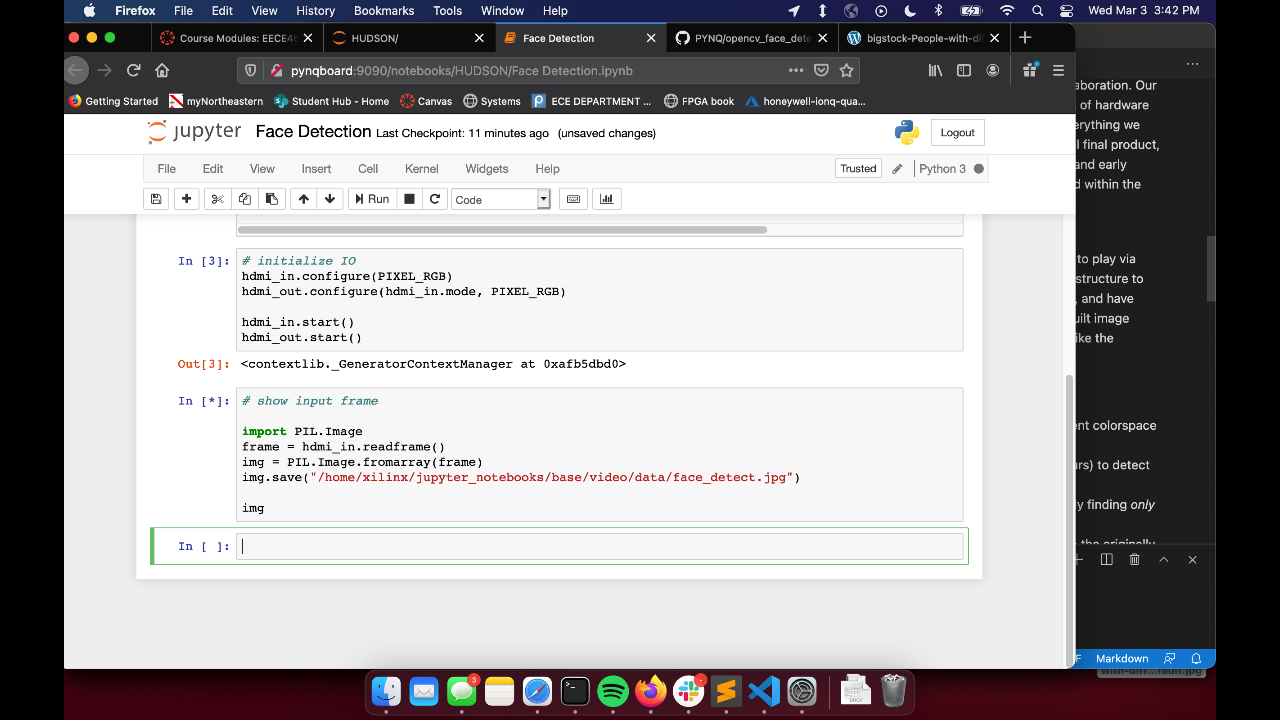

In [4]:
# show input frame

import PIL.Image
frame = hdmi_in.readframe()
img = PIL.Image.fromarray(frame)
img.save("/home/xilinx/jupyter_notebooks/base/video/data/face_detect.jpg")

img

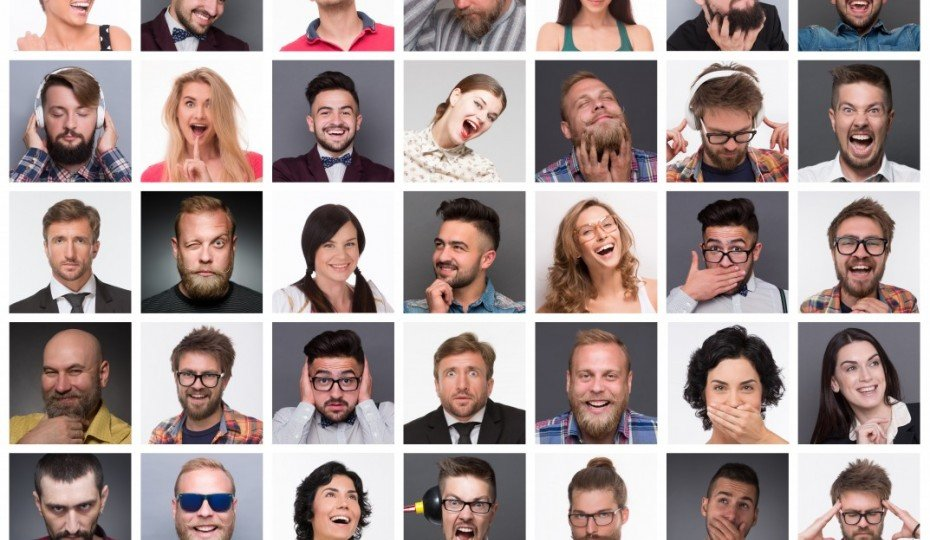

In [10]:
# alternatively: 

img = PIL.Image.open("bigstock-People-with-different-emotions-930x701-thegem-blog-default.jpg")
img

In [31]:
# Apply face detection to the input
import time
import cv2
import numpy as np

face_cascade = cv2.CascadeClassifier(
    '/home/xilinx/jupyter_notebooks/base/video/data/'
    'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(
    '/home/xilinx/jupyter_notebooks/base/video/data/'
    'haarcascade_eye.xml')

numframes = 10
start = time.time()


for ff in range(numframes):
    frame = hdmi_in.readframe()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    
    for (x,y,w,h) in faces:
        cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
            
    hdmi_out.writeframe(frame)
    
end = time.time()
print("Frames per second:  " + str(numframes / (end - start)))

Frames per second:  0.6066535759137281
